# ДЗ №6
## Коваленков Дмитрий

Поработайте с датасетом wine_data (в каждой строке этого датасета содержится информация о бутылках вина одного из трёх видов: в первой колонке - вид вина (1, 2 или 3), в колонках 1-13 - свойства вина). 

A. Решите задачу с помощью DecisionTreeClassifier:
- подберите гиперпараметры алгоритма по кросс-валидации
- постройте validation curve для гиперпараметра max_depth при остальных фиксированных параметрах
- постройте learning curve для алгоритма с уже подобранными параметрами.
Что вы можете сказать об алгоритме? Он переобучился/недообучился/обучился как надо и вы довольны качеством?

B. Попробуйте увеличить число признаков с помощью добавления полиномиальных признаков. Также можно добавить функции от признаков вручную (те, которые вам кажутся подходящими в данной задаче).
Улучшилось ли качество алгоритма?

C. Постройте матрицу корреляций признаков. Есть ли признаки, которые практически не коррелируют с целевой переменной? Попробуйте их удалить. Есть ли пары сильно коррелирующих между собой признаков? Удалите по одному признаку из каждой пары.
Помогло ли это улучшить качество в данной задаче?

Пункты Б и В можно скомбинировать для достижения наилучшего качества.

Далее попробуйте решить исходную задачу линейными методами. Не забудьте масштабировать данные перед применением этих методов.

D. Решите исходную задачу с помощью SVMClassifier с линейным и нелинейными ядрами.

E. Решите исходную задачу с помощью наивного байесовского классификатора (https://scikit-learn.org/stable/modules/naive_bayes.html).

F. Решите исходную задачу с помощью логистической регрессии.

G. Сделайте мини-отчет о проведенной работе. Для этого ответьте на вопросы:
a) какой классификатор дал наилучший результат? чему равны значения метрик MSE и R2?

b) какие новые признаки вы добавили и какие признаки удалили?

c) удалось ли добиться того, что алгоритм не переобучился и не недообучился?

In [1]:
import pandas as pd
import warnings
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split, KFold, learning_curve, validation_curve
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer, Binarizer, PolynomialFeatures
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.pipeline import Pipeline

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('wine_data.csv')
df.tail()

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
172,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740
173,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750
174,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835
175,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840
176,3,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560


In [3]:
y = df['1']
X = df.drop(['1'], axis = 1)

A. Решите задачу с помощью DecisionTreeClassifier:
- подберите гиперпараметры алгоритма по кросс-валидации
- постройте validation curve для гиперпараметра max_depth при остальных фиксированных параметрах
- постройте learning curve для алгоритма с уже подобранными параметрами.
Что вы можете сказать об алгоритме? Он переобучился/недообучился/обучился как надо и вы довольны качеством?

In [4]:
def plot_with_err(x, data, label):
    mu, std = data.mean(axis=1), data.std(axis=1)
    lines = plt.plot(x, mu,label=label, marker = 'o')
    plt.fill_between(x, mu - std, mu + std, facecolor=lines[0].get_color(), alpha=0.2)

In [5]:
cv = KFold(n_splits=5, shuffle=True, random_state=1108)
params = {'max_depth': np.arange(1,11)}

grid_clf = GridSearchCV(DecisionTreeClassifier(random_state=1108), param_grid=params, cv = cv)
grid_clf.fit(X,y)

grid_clf.best_params_, grid_clf.best_score_

({'max_depth': 3}, 0.903954802259887)

(0.5, 1.1)

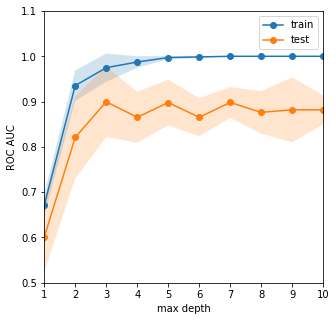

In [14]:
val_train, val_test = validation_curve(DecisionTreeClassifier(), 
                                       X, y, 'max_depth', np.arange(1,11), cv = 5)

plt.figure(figsize=(5,5))
plot_with_err(params['max_depth'], val_train, 'train')
plot_with_err(params['max_depth'], val_test, 'test')
plt.legend()

plt.xlabel('max depth'); plt.ylabel('ROC AUC')
plt.xlim(1,10); plt.ylim(0.5,1.1)

Text(0, 0.5, 'ROC AUC')

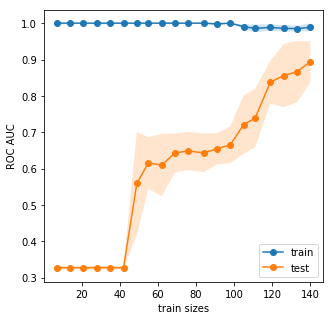

In [18]:
train_sizes = np.linspace(0.05,1,20)
N, val_train, val_test = learning_curve(DecisionTreeClassifier(max_depth=3), 
                                       X, y, train_sizes=train_sizes, cv = 5)

plt.figure(figsize=(5,5))
plot_with_err(N, val_train, 'train')
plot_with_err(N, val_test, 'test')
plt.legend()

plt.xlabel('train sizes'); plt.ylabel('ROC AUC')

 - Можно сказать, что оптимальная глубина дерева  - 3
 - И чем больше данных, тем меньше переобучение
 - Качество считаю приемлимым, но надо учесть тот факт, что оно сильно зависит от выборки

B. Попробуйте увеличить число признаков с помощью добавления полиномиальных признаков. Также можно добавить функции от признаков вручную (те, которые вам кажутся подходящими в данной задаче).
Улучшилось ли качество алгоритма?

C. Постройте матрицу корреляций признаков. Есть ли признаки, которые практически не коррелируют с целевой переменной? Попробуйте их удалить. Есть ли пары сильно коррелирующих между собой признаков? Удалите по одному признаку из каждой пары.
Помогло ли это улучшить качество в данной задаче?

Пункты B и С можно скомбинировать для достижения наилучшего качества.

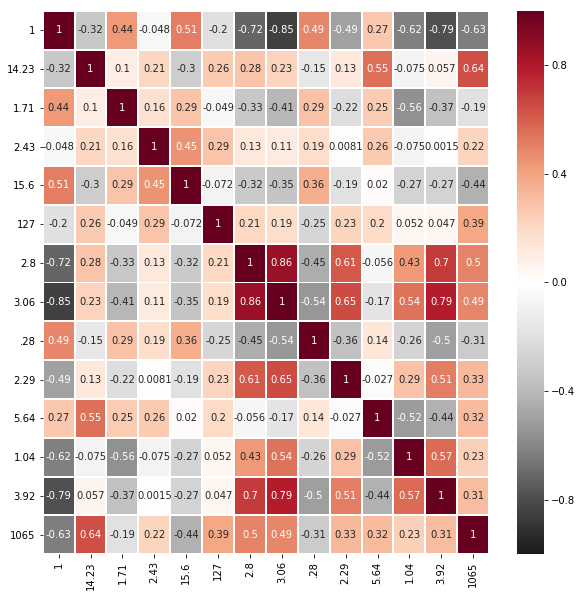

In [12]:
sns.heatmap(df.corr(), annot = True, vmin = -1, vmax = 1, lw=1, cmap= 'RdGy_r')
fig = plt.gcf()
fig.set_size_inches(10,10)

In [13]:
## Оценим качество исходном модели, подобранной на кросс-валидации

clf = grid_clf.best_estimator_
cross_val_score(clf, X, y, cv = cv).mean()

0.9038095238095238

In [14]:
## Удалим признаки с низкой корреляцией с целевой переменной

X_up1 = X.drop(['2.43', '5.64', '127'], axis = 1)
cross_val_score(clf, X_up1, y, cv = cv).mean()

0.915079365079365

In [15]:
## Оставим некоторые наиболее скоррелированные признаки

X_up2 = X[['3.06', '1065', '1.04','15.6']]
p = PolynomialFeatures()
X_up_sq = p.fit_transform(X_up2)

# Проверим качество на исходных и полиномиальных признаках
cross_val_score(clf, X_up2, y, cv = cv).mean(),cross_val_score(clf, X_up_sq, y, cv = cv).mean()

(0.9209523809523809, 0.9265079365079364)

- объектов мало, излишне усложнять модель не имеет смысла, хорошего качества можно добиться и меньшим числом признаков (последний пример)

Далее попробуйте решить исходную задачу линейными методами. Не забудьте масштабировать данные перед применением этих методов.

D. Решите исходную задачу с помощью SVMClassifier с линейным и нелинейными ядрами.

In [16]:
svc_pipe = Pipeline([('scaler', StandardScaler()),
         ('svm', SVC())])


params = {'svm__kernel': ['linear', 'poly', 'rbf', 'sigmoid']}

## Подберем лучшее ядро по кросс-валидации
grid = GridSearchCV(svc_pipe, param_grid=params, cv = cv)

grid.fit(X,y)

grid.best_params_, grid.best_score_

({'svm__kernel': 'sigmoid'}, 0.9830508474576272)

In [17]:
## SVM с линейным ядром
svc_pipe = Pipeline([('scaler', MinMaxScaler()), ('svm', SVC(kernel='linear'))])
cross_val_score(svc_pipe, X, y, cv = cv).mean()

0.9830158730158731

In [18]:
## SVM с rbf ядром
svc_pipe = Pipeline([('scaler', MinMaxScaler()), ('svm', SVC(kernel='rbf'))])
cross_val_score(svc_pipe, X, y, cv = cv).mean()

0.9887301587301588

- SVM практически идеально решает задачу (с линейным и rbf ядром)

E. Решите исходную задачу с помощью наивного байесовского классификатора (https://scikit-learn.org/stable/modules/naive_bayes.html).

In [35]:
# Попробуем все классификаторы без настроек
from sklearn.naive_bayes import BernoulliNB, ComplementNB, MultinomialNB, GaussianNB

In [36]:
cross_val_score(BernoulliNB(), X, y, cv=cv).mean()

0.40174603174603174

In [37]:
cross_val_score(ComplementNB(), X, y, cv=cv).mean()

0.6446031746031745

In [38]:
cross_val_score(MultinomialNB(), X, y, cv=cv).mean()

0.8590476190476191

In [40]:
cross_val_score(GaussianNB(), X, y, cv=cv).mean() # Лучший результат на кросс-валидации

0.9715873015873017

F. Решите исходную задачу с помощью логистической регрессии.

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
# Базовая логистическая регрессия
cross_val_score(LogisticRegression(), X, y, cv = cv).mean()

0.9546031746031746

In [21]:
## Подберем наиболее лучшие параметры для логистической регрессии
lr_pipe = Pipeline([('scaler', MinMaxScaler()), ('lr', LogisticRegression(random_state=1108))])
cross_val_score(lr_pipe, X, y, cv = cv).mean()

params = {'lr__C': np.logspace(-2,2,20), 'lr__penalty': ['l1','l2']}
grid_lr = GridSearchCV(lr_pipe, param_grid=params)
grid_lr.fit(X, y)
grid_lr.best_params_, grid_lr.best_score_

({'lr__C': 23.357214690901213, 'lr__penalty': 'l1'}, 0.9830508474576272)

In [22]:
## Максимальное качество обобщающей способности модели
cross_val_score(grid_lr.best_estimator_, X, y, cv = cv).mean()

0.9830158730158731

- Логистическая регрессия показала результат на уровне метода SVM (немножко ему уступает, в 3-ем знаке посля запятой), на третьем месте байесовский классификатор GaussianNB

G. Сделайте мини-отчет о проведенной работе. Для этого ответьте на вопросы:

a) какой классификатор дал наилучший результат? чему равны значения метрик MSE и R2?

b) какие новые признаки вы добавили и какие признаки удалили?

c) удалось ли добиться того, что алгоритм не переобучился и не недообучился?

- а) Лучший результат показали логистическая регрессия и SVM.  

Значения метрик $MSE$, $R^2$ нам не нужны, так как решаем задачу классификации

- b) Были оставлены наиболее коррелирующие с y признаки, а где-то удалены признаки с наименьшей корреляцией. Данных мало, смысла усложнять модель за счет увеличения числа признаков нет.

(пробовал разные преобразования: $log$, $sin$, $x^z$ - ощутимого результата это нигде не принесло)

- с) Качество всех моделей оценивалось на кросс-валидации, которая по определению оценивает способность обобщать оценки модели на новые данные. И судя по результатам, модели вышли не переобученные. За исключением, быть может, решающего дерева, которое в принципе зависит от обучающей выборки